<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.5/image_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4431872/4422102 [==============================] - 0s 0us/step


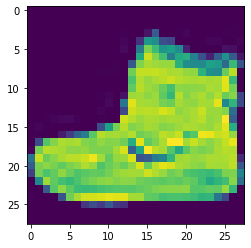

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train), (x_test,y_test)=fashion_mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

# **Define Sobel filter**

(27, 27)


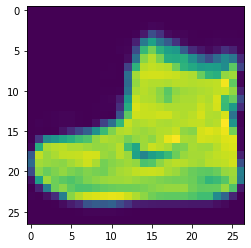

In [2]:
import numpy as np
import cv2


horizontal_filter=np.array([[1.,2.,1.],
                            [0.,0.,0.],
                            [-1.,-2.,-1.]])

vertical_filter=np.transpose(horizontal_filter)

test_image=cv2.resize(x_train[0],(27,27))
image_size=test_image.shape[0]
output_size=int((image_size-3)/1+1)
print(test_image.shape)
plt.imshow(test_image)

# **Applying filter to the image**

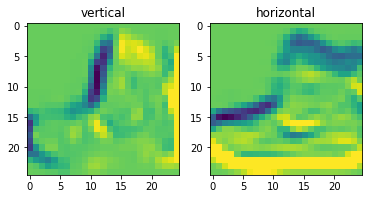

In [3]:
filter_size=3

def get_filtered_image(filter):
  filtered_image=np.zeros((output_size,output_size))
  for i in range(output_size):
    for j in range(output_size):
      indice_image=test_image[i:(i+filter_size),j:(j+filter_size)]*filter
      indice_sum=np.sum(indice_image)
      if(indice_sum>255):
        indice_sum=255
      filtered_image[i,j]=indice_sum
  return filtered_image

viertical_filtered_image=get_filtered_image(vertical_filter)
horizontal_filtered_image=get_filtered_image(horizontal_filter)

plt.subplot(1,2,1)
plt.title('vertical')
plt.imshow(viertical_filtered_image)

plt.subplot(1,2,2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()


# **Final result**

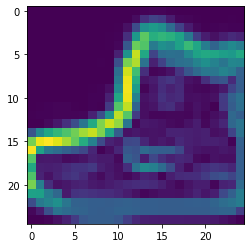

In [4]:
sobel_image=np.sqrt(np.square(horizontal_filtered_image)+np.square(viertical_filtered_image))
plt.imshow(sobel_image)
plt.show()

# **Pooling filter**

original image shape: (28,28)
pooled image shape: (14,14)


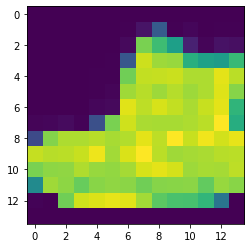

In [7]:
import numpy as np

image=x_train[0]
image_x=image.shape[0]
image_y=image.shape[1]

new_image_x=int(image_x/2)
new_image_y=int(image_y/2)

pooled_image=np.zeros((new_image_x,new_image_y))

print(f'original image shape: ({image_x},{image_y})')
print(f'pooled image shape: ({new_image_x},{new_image_y})')

for x in range(0,image_x,2):
  for y in range(0,image_y,2):
    pooled_image[int(x/2)][int(y/2)]=np.max(image[x:x+2,y:y+2])

plt.imshow(pooled_image)
plt.show()